<h1>Research iteration 1</h1>

<i>Sjoerd Beetsma, Maarten de Jeu
Class V2A - Group 5</i>

<h2>Business Understanding</h2>

Through the business, we have been asked to examine the following questions:

<ol>
<li>Can we predict the quality of a red-wine according to its chemical properties?</li>
<li>To be decided..</li>
<li>To be decided.</li>
</ol>

Currently, the exact nature of 'the business' and their desires datascience-wise are unknown to us. This requires further investigation.

<h2> Data Understanding </h2>

The business tells us the most important variables in the dataset are:

<ol>
<li>Origin of wine and type of grape.</li>
<li>Review of a wine including the name of the sommelier with a score from 1 to 100.</li>
<li>The results of chemical tests on 11 properties (including residual sugar, pH, AlcoholDe uitkomsten van chemische tests op 11 waarde (waaronder suikergehalte, pH, alcoholgehalte, etcetera).</li>

We import some libraries, and the dataset. Then we have an initial look at it:

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv("datasets/redwine.csv", sep=";")
dataset.head(5)

,id,country,description,designation,points,price,province,taster_name,title,variety,...,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Kerin O�Keefe,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,...,0.29,0.4,2.9,0.098,10.0,26.0,10.006,3.48,0.91,9.7
1,2,Portugal,"From an estate in the south of the Alentejo, t...",Grande Reserva Tinto,91,26.0,Alentejano,Roger Voss,Casa Santa Vit�ria 2013 Grande Reserva Tinto R...,Portuguese Red,...,0.26,0.37,1.4,0.076,8.0,23.0,0.9974,3.26,0.70,9.6
2,3,Portugal,A year in wood and 30 months in bottle before ...,Montes Claros Garrafeira,90,28.0,Alentejo,Paul Gregutt,Adega Cooperativa de Borba 2012 Montes Claros ...,Portuguese Red,...,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3
3,4,Portugal,Wood aging gives this ripe blend of Baga and T...,NaN,90,20.0,Beira Atlantico,Alexander Peartree,Quinta de Foz de Arouce 2013 Red (Beira Atlant...,Portuguese Red,...,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3
4,5,Portugal,"A powerful wine, richly structured and full of...",Gera��es Colheita Seleccionada,92,34.0,Alentejano,Paul Gregutt,Herdade Grande 2010 Gera��es Colheita Seleccio...,Portuguese Red,...,0.48,0.34,2.2,0.073,16.0,25.0,0.9936,3.28,0.66,12.4


Rows seems to correspond with individual wines on first glance, though this does need to be examined more thoroughly. Columns are different attributes for those individual wines.

<h3>Feature variables</h3>

Here we remove the columns: country, variety, description, title, taster_name and id. They are unnecessary for our model in determining the Target, which is points.
Country and variety are possible feature variables but are left out for now as the dataset contains only 1 unique country and variety.

In [3]:
dataset_features_target = dataset.drop(['country', 'variety', 'description', 'title', 'taster_name', 'id'], axis=1)
dataset_features_target.head(0)

,designation,points,price,province,winery,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol


<h3> Scales of measurements </h3>

To construct an appropiate model it's necessary to have a understanding of all the scales of measurements for the target and feature variables.

In [4]:
nom, disc, cont = 'Nominal', 'Discrete', 'Continous'
vars_scale = [nom, disc, disc, nom, nom, cont, cont, cont, cont, cont, cont, cont, cont, cont, cont, cont ]
measurement_scales = pd.DataFrame({'Variable':dataset_features_target.columns, 'Scale of measurement':vars_scale})
measurement_scales

,Variable,Scale of measurement
0,designation,Nominal
1,points,Discrete
2,price,Discrete
3,province,Nominal
4,winery,Nominal
5,fixed acidity,Continous
6,volatile acidity,Continous
7,citric acid,Continous
8,residual sugar,Continous
9,chlorides,Continous


<h3>Central tendancies and dispersion measures</h3>

From the central tendancies and dispersion measures we can see some useful statistics about the target and feature variables.

In [5]:
dataset_features_target.describe().round(2)

,points,price,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates
count,2465.00,2196.00,2465.00,2465.00,2465.00,2465.00,2465.00,2465.00,2465.00,2465.00
mean,88.81,24.82,8.35,0.53,2.56,0.09,15.80,47.22,3.31,0.66
std,2.97,25.54,1.73,0.18,1.41,0.05,10.38,33.19,0.15,0.17
min,81.00,5.00,4.60,0.12,0.90,0.01,1.00,6.00,2.74,0.33
25%,87.00,12.00,7.10,0.40,1.90,0.07,7.00,22.00,3.21,0.55
50%,88.00,17.00,7.90,0.52,2.20,0.08,14.00,38.00,3.31,0.62
75%,91.00,28.00,9.30,0.64,2.60,0.09,21.00,64.00,3.40,0.73
max,100.00,450.00,15.90,1.58,15.50,0.61,72.00,289.00,4.01,2.00


To be noted the feature variables alcohol, density, citric acid aren't described even though they are of discrete scale, we will look at what's wrong during the data preparation phase.

<h3>Distribution of data</h3>

Lets take a more visual look at the distribution of all the variables through a histogram for each of the feature and target attributes.

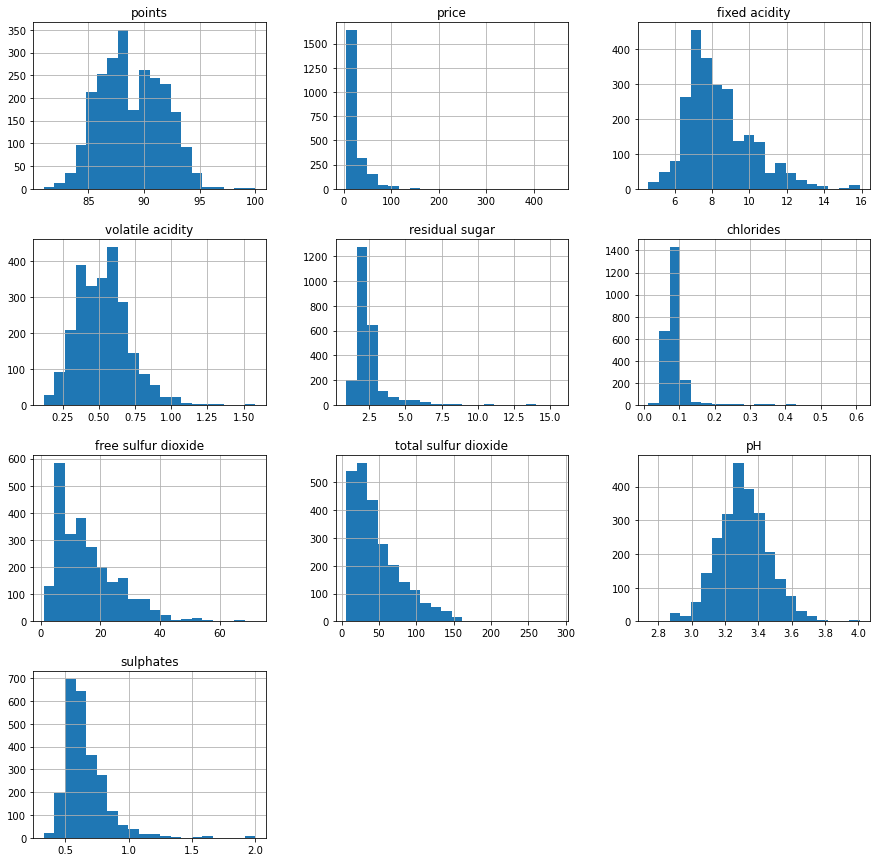

In [6]:
dataset_features_target.hist(figsize=(15,15), bins = 20)
plt.show()

The distributions of pH seems to follow a normal distribution.
From the points and price histogram we can see that most wines range from a relatively high score between 85 and 90. And most wines ranging in a price from around 5 to 30.

<h3>Outliers</h3>

To get a visual understanding of the outliers in the feature columns each feature gets a boxplotted with the target variable points. Giving a small summary of the minimum, Q1, Q2 (median), Q3 and the maximum of each attribute plotted against points scored to give a view of outliers at all quality/point levels.

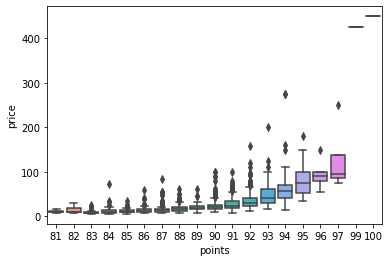

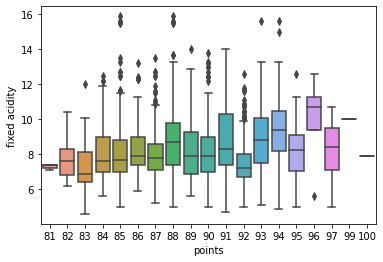

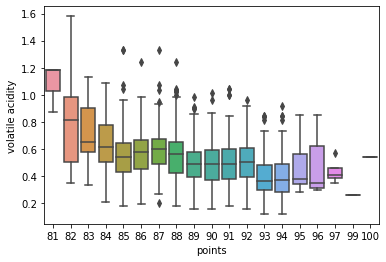

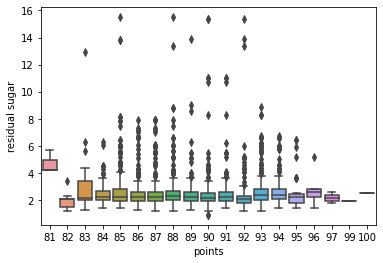

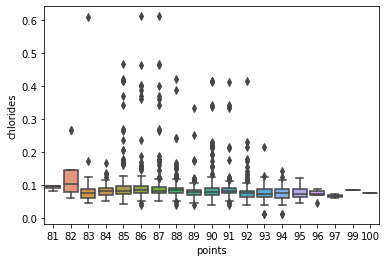

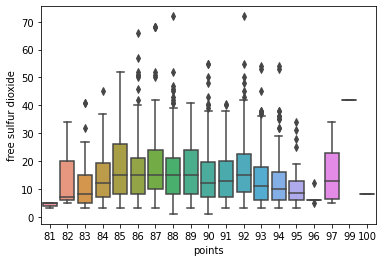

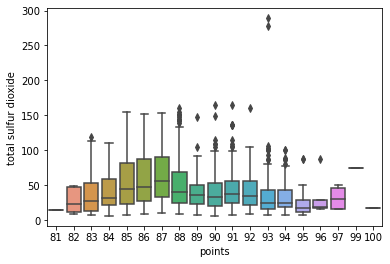

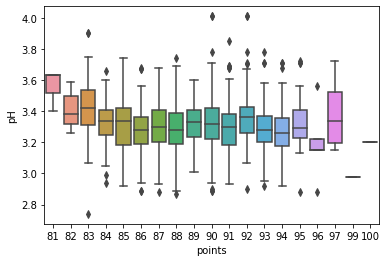

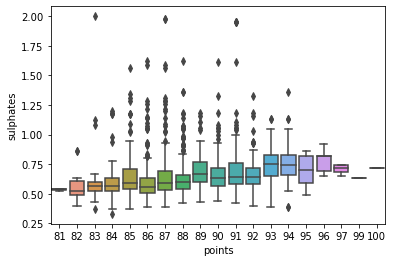

In [7]:
for col in dataset_features_target.select_dtypes(include=np.number, exclude=None).drop('points', axis=1): # x-axis requires numerical value and don't plot id
    sns.boxplot(x=dataset['points'], y=dataset[col])
    plt.show()

As can be seen from the boxplots all of our current variables (beside the ones that need to be cleaned before further data understanding) contain outliers.

All outliers in the above boxplots seem to be plausible and not from incorrect data.
From the boxplot with price on the y axis and points on the x axis we can clearly see that the price of a wine is related to the quality of the wine.
Also we can tell that wines with a quality of 92 or higher have a volatile acidity below 1.

<h3>Correlations</h3>

To help find positive, negative and neutral correlations matrix is constructed where dark red corresponds to a positive correlation and green a negative correlation.

We create this correlation matrix with the help of a function, so that we can reuse it later.

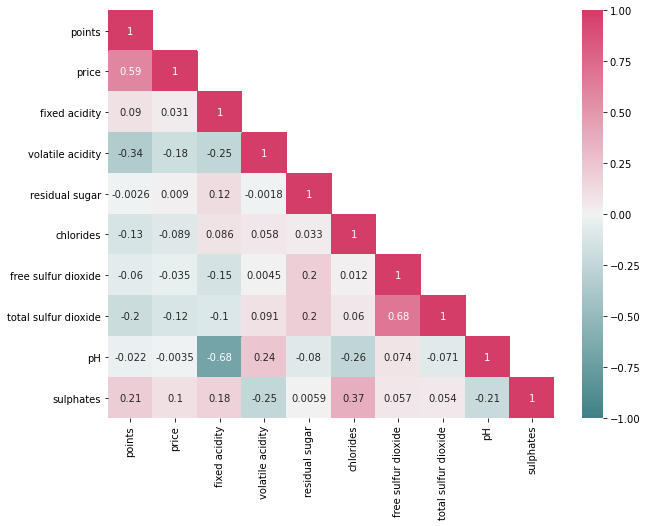

In [8]:
def correlation_matrix(dataset: pd.DataFrame):
    """Return a correlation matrix created using seaborn and matplotlib that for all columns in
    a pandas dataframe.

    Args:
        dataset: Dataset to construct correlation matrix for.

    Returns:
        correlation matrix."""
    corr = dataset.corr()
    plt.figure(figsize=(10,7.5))
    cmap = sns.diverging_palette(200, 0, as_cmap=True) # color palette as cmap
    mask = np.logical_not(np.tril(np.ones_like(corr))) # triangle mask
    sns.heatmap(corr,annot=True, mask=mask, cmap = cmap, vmin=-1, vmax=1) # correlation heatmap


correlation_matrix(dataset_features_target)

In the correlation matrix graph above you can see which attributes have a correlation to other attributes. Starting with our target variable 'quality', we can see quality has a few correlations with the strongest one being alcohol and a few weaker ones like volatile acidity, sulphates and citric acid. Because quality is our target variable it's independent attribute in the correlation.

Getting rid of outliers might bring the absolute value of the correlation scores closer to one, but this would be something to look at again during data preparation.

Besides there are some correlations among chemical properties:
Fixed acidity has strong correlation with pH, but it’s still an independent type. pH However is a dependent type; it depends on the former. Volatile acidity, residual sugar, sulphates, chlorides, and density are all independent data types. Total sulfur dioxide is dependent on free sulfur dioxide, but free sulfur dioxide is independent.

<h2>Data Preparation</h2>

The data needs some cleaning up. Because it might be useful to be able to view columns that were droppped in Data Exploration to gain more understanding, like wine titles, we'll be operating on the original dataset.

The current policy we'll be adhering to outlier-wise, is that outliers that are somewhat realistic won't be dropped (for now). Our philosophy is that these might still be relevant for some models, so we won't drop them until absolutely necessary. Outliers that are obvious errors will be dropped.

An overview of datatypes:

In [9]:
dataset.dtypes

id                        int64
country                  object
description              object
designation              object
points                    int64
price                   float64
province                 object
taster_name              object
title                    object
variety                  object
winery                   object
fixed acidity           float64
volatile acidity        float64
citric acid              object
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                  object
pH                      float64
sulphates               float64
alcohol                  object
dtype: object

Jupyter doesn't recognize some of the Python str objects for what they are, and simply calls them the 'object' type. Let's convert them to the right type to allow for more method flexibility:

In [10]:
dataset = dataset.convert_dtypes()
dataset.dtypes

id                        Int64
country                  string
description              string
designation              string
points                    Int64
price                     Int64
province                 string
taster_name              string
title                    string
variety                  string
winery                   string
fixed acidity           Float64
volatile acidity        Float64
citric acid              string
residual sugar          Float64
chlorides               Float64
free sulfur dioxide     Float64
total sulfur dioxide    Float64
density                  string
pH                      Float64
sulphates               Float64
alcohol                  string
dtype: object

There are some datatypes in the DataFrame that don't quite correspond to what you'd expect them to be, considering what they represent. Citric acid, Density and Alcohol are string objects, even though you'd expect them to be some kind of number-datatype. Let's copy everyone to a seperate column called 'raw_columnname' so that we can evaluate the original next to the converted in case we run into any problems turning these columns into numbers. Then we'll convert each one individually.

In [11]:
problematic_column_names = ["citric acid", "density", "alcohol"]
copied_column_names = {f"raw_{name}":name for name in problematic_column_names}

for new, to_copy in copied_column_names.items():  # Is this allowed?
    dataset[new] = dataset[to_copy]

<h3>Data Preparation on column-by-column basis</h3>

<h4>Citric Acid</h4>

The citric acid column consists of string objects, through most entries are formatted like floats. Pandas can convert these for us, turning the ones that it can't understand into not-a-number entries.

In [12]:
dataset["citric acid"]

0        0.4
1       0.37
2       0.07
3       0.07
4       0.34
        ... 
2460     0.5
2461    0.51
2462    0.08
2463    0.22
2464    0.37
Name: citric acid, Length: 2465, dtype: string

In [13]:
dataset["citric acid"] = pd.to_numeric(dataset["citric acid"], errors='coerce')

And let's define a simple convenience function that describes the min, max and amount of nan entries in a series object, to quickly gauge the validity of data contained within, and call it on the Citric Acid column.

In [14]:
def simple_describe(s: pd.Series, name: str = "Series object") -> None:
    """Print out a simple description of a Pandas Series object that contains numeric values.
    That covers min, max and amount of nan/None entries.

    Args:
        s: Pandas series object with numeric values.
        name: optional name for the series to use in the printed description."""
    print(f"{name}:\nmin: {np.min(s)}\nmax: {np.max(s)}\n#(nan): {s.isnull().sum()}")

simple_describe(dataset["citric acid"], "Citric acid")

Citric acid:
min: 0.01
max: 1.0
#(nan): 203


Auto converting the citric acid table to float leaves us with 203 not-a-number entries. Lets have a look at them.

In [15]:
dataset.loc[dataset["citric acid"].isnull()][["id", "title", "citric acid", "raw_citric acid"]]

,id,title,citric acid,raw_citric acid
7,8,Quinta do Monte Xisto 2013 Red (Douro),NaN,-
11,12,Roquette e Cazes 2007 Red (Douro),NaN,-
22,23,Alves de Sousa 2013 Abandonado Red (Douro),NaN,-
41,42,Casa Santos Lima 2015 Fortissimo Red (Alentejano),NaN,-
46,47,Rui Roboredo Madeira 2015 Beyra Colheita Red (...,NaN,-
...,...,...,...,...
2379,2381,Herdade Grande 2004 Reserva Red (Alentejano),NaN,-
2420,2422,Wines & Winemakers 2015 Lua Cheia em Vinhas Ve...,NaN,-
2424,2426,Casca Wines 2015 Monte Cascas Colheita Red (Al...,NaN,-
2432,2434,DFJ Vinhos 2014 Monte Alentejano Red (Alentejano),NaN,-


It appears these data points did not have a value for citric acid to begin with. According to <a href="https://wineserver.ucdavis.edu/industry-info/enology/methods-and-techniques/common-chemical-reagents/citric-acid">this website</a>, citric acid is something that's <i>added</i> to wine most of the time, but it doesn't seem essential. We'll assume that the wines with '-' for citric acid were given this value on purpose, and that this means that there's none in there. Let's replace those values with 0 in the raw table, and use that to create a final version of the citric acid table. Then we'll describe it again.

In [16]:
dataset['raw_citric acid'] = dataset['raw_citric acid'].str.replace('-', '0')
dataset['citric acid'] = pd.to_numeric(dataset["raw_citric acid"], errors='coerce')
simple_describe(dataset['citric acid'])

Series object:
min: 0.0
max: 1.0
#(nan): 0


Citric acid seems clean!

<h4>Density</h4>

Most density values are formatted like proper floats, so let's have pandas turn them into that, and then describe it. This time, the simple describe won't quite cut it.

In [17]:
dataset["density"]

0        10.006
1        0.9974
2       0.99572
3       0.99572
4        0.9936
         ...   
2460     0.9952
2461      0.995
2462     0.9971
2463    0.99678
2464     0.9974
Name: density, Length: 2465, dtype: string

In [18]:
dataset["density"] = pd.to_numeric(dataset["density"], errors='coerce')
dataset["density"].describe()

count    2464.000000
mean        2.189505
std         9.446440
min         0.990070
25%         0.995687
50%         0.996800
75%         0.997900
max       100.369000
Name: density, dtype: float64

From the description, we see that almost all values (the mininum, and all quartiles) fall around the 0.99 range. Let's examine the spread of data further with the help of a frequency graph.

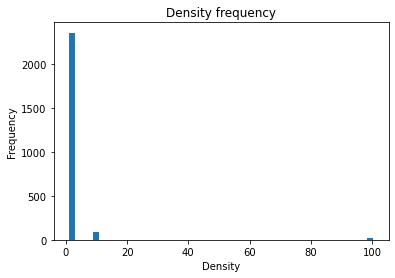

In [19]:
plt.hist(dataset["density"], bins=50)
plt.gca().set(title="Density frequency", xlabel="Density", ylabel="Frequency")
plt.show()

As we can see, most measurements fall around the '0.99' mark. Though some fall around the 10, and a couple fall around the 100 mark. We will assume that this is a notation error, where the dots weren't placed right, which can fairly easily be accounted for. If we assume that all measurements are supposed to be around '1', because it wouldn't be realistic for wines to have a 10x or 100x difference in density with others, we can correct for the mistake by recursively dividing the number by 10, until a more sensible measurement is reached.

In [20]:
def divide_until_at(num: float,
                    target: float,
                    divide_by: float,
                    delta: float,
                    max_recursions: int = 0) -> float:
    """Recursively divide a number until it's either within a certain range of a target number,
    or the max number of recursions is reached.

    Args:
        num: input number to divide.
        target: target number to get within a certain range of.
        divide_by: number to divide input number by.
        delta: amount of distance the input number could be from the target number to be considered a success.
        max_recursion: amount of recursion after which the function should give up.

    Returns:
        num divided by divide_by a certain amount of times, so that it's within delta of target.
        amount of times num is divided can also be 0.
        None if max_recursions gets violated."""
    if max_recursions < 0:
        return None
    if abs(num - target) < delta:
        return num
    return divide_until_at((num / divide_by), target, divide_by, delta, (max_recursions - 1))

dataset["density"] = dataset["density"].apply(lambda x: divide_until_at(x, 1, 10, 0.1, 2))
dataset["density"].describe()

count    2464.000000
mean        0.996824
std         0.001870
min         0.990070
25%         0.995687
50%         0.996800
75%         0.997900
max         1.003690
Name: density, dtype: float64

In [21]:
simple_describe(dataset["density"], "Density")

Density:
min: 0.99007
max: 1.00369
#(nan): 1


The weird numbers have been taken care of. A single not-a-number entry remains. Let's have a look:

In [22]:
dataset.loc[dataset["density"].isnull()][['id', 'title', 'density', 'raw_density']]

,id,title,density,raw_density
1474,1475,Howard's Folly 2011 Sonhador Red (Alentejano),NaN,.


A single wine has a density of '.', which we can't really use for anything. To keep the data pure, let's drop it.

In [23]:
dataset = dataset[dataset["density"].notna()]
simple_describe(dataset["density"], "Density")

Density:
min: 0.99007
max: 1.00369
#(nan): 0


Density is clean!

<h4>Alcohol</h4>

Most alcohol percentages are formatted like proper floats, and can be converted automatically. This allows us to analyse the actual numbers as well:

In [24]:
dataset["alcohol"] = pd.to_numeric(dataset["alcohol"], errors='coerce')  # No OOP interface.
simple_describe(dataset["alcohol"], "Alcohol")

Alcohol:
min: 8.5
max: 14.9
#(nan): 10


The alcohol-percentages we have been able to extract from the String objects seem to fall within the boundaries of what could reasonably be considered 'wine'. We are still left with 10 not-a-numbers entries where pandas wasn't able to convert the strings to numbers. Let's have a look at them.

In [25]:
dataset.loc[dataset["alcohol"].isnull()][['id', 'title', 'designation', 'alcohol']]

,id,title,designation,alcohol
1344,1345,Companhia das Quintas 2009 Herdade da Farizoa ...,Herdade da Farizoa Grand Escolha,NaN
1345,1346,Companhia das Quintas 2009 Quinta da Fronteira...,Quinta da Fronteira Selec��o do En�logo,NaN
1620,1621,Quinta das Bandeiras 2013 Passagem Reserva Red...,Passagem Reserva,NaN
1670,1671,Quinta da Rede 2015 Reserva Red (Douro),Reserva,NaN
1764,1765,Terra Silvestre 2014 B�toreus Selection Red (T...,B�toreus Selection,NaN
1765,1766,Adega Cooperativa de Borba 2013 Reserva Red (A...,Reserva,NaN
1766,1767,Adega Cooperativa do Cartaxo 2012 Brid�o Class...,Brid�o Classico,NaN
1794,1795,Quinta da Lagoalva de Cima 2015 Lagoalva Barre...,Lagoalva Barrel Selection,NaN
1795,1796,Quinta do Casal Branco 2014 Lobo e Falc�o Rese...,Lobo e Falc�o Reserva,NaN
2028,2029,Ramos-Pinto 2006 Duas Quintas Reserva Red (Douro),Duas Quintas Reserva,NaN


Considering only 10 wines are missing data, we can probably look these up by hand. The percentages are based on these sources:

<a href="https://www.internationalwinechallenge.com/canopy/beverage_details?wid=44074">1344. </a><a href="https://www.winemag.com/buying-guide/companhia-das-quintas-2009-quinta-da-fronteira-seleccao-do-enologo-red-douro/">1345. </a><a href="https://www.winemag.com/buying-guide/quinta-das-bandeiras-2010-passagem-reserva-red-douro/">1620. </a><a href="https://www.nataliemaclean.com/wine-reviews/quinta-da-rede-reserva-2015/317025">1670. </a><a href="https://www.winemag.com/buying-guide/terra-silvestre-2014-grande-reserva-red-tejo-portuguese-red/">1764. </a><a href="https://www.vivino.com/NL/en/adega-cooperativa-de-borba-alentejo-reserva-tinto/w/1235048?year=2013">1765. </a><a href="https://www.winemag.com/buying-guide/adega-cooperativa-cartaxo-2012-bridao-classico-red-tejo/">1766. </a><a href="https://www.winemag.com/buying-guide/quinta-da-lagoalva-de-cima-2015-lagoalva-barrel-selection-red-tejo/">1794. </a><a href="https://www.winemag.com/buying-guide/quinta-do-casal-branco-2014-lobo-e-falcao-reserva-red-tejo/">1795. </a><a href="https://www.wine-searcher.com/find/ramos+pinto+duas+quinta+rsrv+douro+portugal/2006/netherlands#t2">2028. </a>

In [26]:
# Assignments use numeric row index, and not 'id' column. Might break when working on the id column.
dataset.loc[1344, "alcohol"] = 14.0
dataset.loc[1345, "alcohol"] = 14.5
dataset.loc[1620, "alcohol"] = 14.0
dataset.loc[1670, "alcohol"] = 13.5
dataset.loc[1764, "alcohol"] = 13.5
dataset.loc[1765, "alcohol"] = 14.0
dataset.loc[1766, "alcohol"] = 14.0
dataset.loc[1794, "alcohol"] = 14.0
dataset.loc[1795, "alcohol"] = 14.0
dataset.loc[2028, "alcohol"] = 14.0

Lets' have a look how many nan entries are left in the alcohol column:

In [27]:
dataset["alcohol"].isnull().sum()

0

Alcohol is clean!

Having converted and cleaned up all tables in the dataset that Pandas interpreted as strings, all that remains is to clean up the remaining columns.

<h4>Designation</h4>

Designation contains what 'category' a wine is. This should be a categorial variable.

In [28]:
dataset["designation"] = dataset["designation"].astype("category")

Done!

<h4>Points</h4>

Points contains discrete values that represent review-points. Data-exploration showed that this contained no unexpected-values, and is stored as an integer. So this needs no extra work.

<h4>Price</h4>

Data exploration showed that price is treated as an integer, which makes sense. The histogram in data exploration showed that most measurements fall within the 0-100 range, with some in the 100-200 range. Notably, the x-axis on the histogram stretches all the way to around 400, with no measurements visible (probably because the frequency is so low). Let's see whether there's some hard to see measurements there.


In [29]:
dataset[dataset["price"] > 300]

,id,country,description,designation,points,price,province,taster_name,title,variety,...,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,raw_citric acid,raw_density,raw_alcohol
832,833,Portugal,This is the latest release of what has long be...,Barca-Velha,100,450,Douro,Michael Schachner,Casa Ferreirinha 2008 Barca-Velha Red (Douro),Portuguese Red,...,0.076,8.0,17.0,0.99235,3.2,0.72,13.1,0.34,0.99235,13.1
1077,1078,Portugal,This is the latest release of Portugal's most ...,Barca Velha,99,426,Douro,Roger Voss,Casa Ferreirinha 2004 Barca Velha Red (Douro),Portuguese Red,...,0.083,42.0,74.0,0.99451,2.98,0.63,11.8,0.54,0.99451,11.8


Let's look up these wines by hand just to be sure these are accurate.
<a href="https://www.vivino.com/US/en/casa-ferreirinha-barca-velha-douro/w/75975?year=2008">Wine 833</a> is 638.48 dollars at the time of writing.
<a href="https://www.wine-searcher.com/find/casa+ferreirinha+barca+velha+douro+portugal/2004/europe">Wine 1078</a> is 633 dollars at the time of writing.

It makes sense that these wines have gotten more expensive since the dataset was created. We'll take this as enough evidence to take these prices as fact, and not change them.

<h4>Province</h4>

Province contains strings, and should be categorical. Let's change them to categories, and then have a look at the values.


In [30]:
dataset["province"] = dataset["province"].astype("category")
dataset["province"].value_counts()

Douro                    880
Alentejano               534
Tejo                     274
Lisboa                   228
D�o                      176
Alentejo                 126
Bairrada                  66
Pen�nsula de Set�bal      44
Beira Interior            18
Setubal                   13
Estremadura               12
Ribatejano                11
Ribatejo                  10
Algarve                    8
Tr�s-os-Montes             8
Portuguese Table Wine      8
Obidos                     8
Alenquer                   6
Duriense                   5
Beiras                     5
Vinho Verde                4
Terras do Sado             4
Terras do D�o              4
Minho                      3
Beira Atlantico            3
Palmela                    2
Table wine                 1
Vinho Licoroso             1
Portugal                   1
Vinho da Mesa              1
Name: province, dtype: int64

There are some probable mistakes in there. Most notably, different language versions of the samen regions, and 'wine regions' being used instead of provinces. Let's go by the most important ones:
<ol>
<li>Alentejano isn't a province, and not some other place in portugal as well. We will assume that this is an an English version of Alentejo, which is an actual province.</li>
<li><a href="https://www.portevinho.be/tejo">Tejo is another word for Ribatejo</a></li>
<li><a href="https://en.wikipedia.org/wiki/Bairrada_DOC">Bairrada is a part of the Beira Litoral province</a></li>
<li>Dão is displayed incorrectly by jupiter, but <a href="https://www.quintadoriodao.com/ned/out/dao-wijngaarden-portugal.html">is a wine region in Beira Alta province</a></li>
<li>Península de Setúbal is apart of the Estremadura province</li>
<li>Beira Interior is apart of beira alta</li>
</ol>

We could continue this for a while, but that would take many hours of labor. We'll assume that the errors in the smaller categories won't influence any potential models too much, and possibly fix all the problems in the future if needed.

For now, we'll take all categories with less then 50 members, and and them to a new 'Other' class.

<i><a href="https://althistory.fandom.com/wiki/Provinces_of_Portugal_(Twilight_of_a_New_Era)">Source for provinces</a></i>




In [31]:
dataset["province"] = dataset["province"].replace({
    "Alentejano": "Alentejo",
    "Tejo": "Ribatejo",
    "Bairrada": "Beira Litoral",
    "D�o": "Beira Alta",
    "Pen�nsula de Set�bal": "Estremadura",
    "Beira Interior": "Beira Alta"
})

province_freqs = dataset["province"].value_counts()
to_replace = province_freqs[province_freqs < 50].index.values
dataset["province"] = dataset["province"].replace(to_replace, "Other")

dataset["province"].value_counts()

Douro            880
Alentejo         660
Ribatejo         284
Lisboa           228
Beira Alta       194
Other             96
Beira Litoral     66
Estremadura       56
Name: province, dtype: int64

That's good for now.

<h4>Winery</h4>

Winery should be a categorical variable, so let's turn it into that.



In [32]:
dataset["winery"] = dataset["winery"].astype("category")
dataset["winery"].value_counts()

Wines & Winemakers       84
Casa Santos Lima         82
DFJ Vinhos               77
Companhia das Quintas    53
Casca Wines              50
                         ..
Casa de Santa Vitoria     1
Dow's                     1
Quinta da Beira           1
Quinta da Casaboa         1
Caves Campelo             1
Name: winery, Length: 309, dtype: int64

There are no obvious problems with it.

<h4>Fixed acidity</h4>

From data exploration we know Fixed acidity is a continuous variable, which is stored as Float64, without problematic outliers. There is not much to change.

<h4>Volatile acidity</h4>

From data exploration we know Volatile acidity is a continuous variable, which is stored as Float64, without problematic outliers. There is not much to change.

<h4>Residual sugar</h4>

From data exploration we know Residual sugar is a continuous variable, which is stored as Float64, without problematic outliers. There is not much to change.

<h4>Chlorides</h4>

From data exploration we know Chlorides is a continuous variable, which is stored as Float64, without problematic outliers. There is not much to change.

<h4>Free sulfur dioxide</h4>

From data exploration we know Free sulfur dioxide is a continuous variable, which is stored as Float64, without problematic outliers. There is not much to change.

<h4>Total sulfur dioxide</h4>

From data exploration we know Total sulfur dioxide is a continuous variable, which is stored as Float64, without problematic outliers. There is not much to change.

<h4>pH</h4>

From data exploration we know pH is a continuous variable, which is stored as Float64, without problematic outliers. There is not much to change.

<h4>Sulphates</h4>

From data exploration we know Sulphates is a continuous variable, which is stored as Float64, without problematic outliers. There is not much to change.

In [33]:
dataset.dtypes

id                         Int64
country                   string
description               string
designation             category
points                     Int64
price                      Int64
province                  object
taster_name               string
title                     string
variety                   string
winery                  category
fixed acidity            Float64
volatile acidity         Float64
citric acid              float64
residual sugar           Float64
chlorides                Float64
free sulfur dioxide      Float64
total sulfur dioxide     Float64
density                  float64
pH                       Float64
sulphates                Float64
alcohol                  float64
raw_citric acid           string
raw_density               string
raw_alcohol               string
dtype: object

<h3>Dropping unneeded columns</h3>

We drop columns description, taster_name and id, because they are not useful for later models, and hold no sway over our target variable, points. We also drop raw_citric acid, raw_density and raw_alcohol because they are no longer needed in data preparation.

Even though it's not a feature or target, we won't drop title, because we still need it later to help draw conclusions from the data.

Leaving us with a dataset containing clean target and feature variables.


In [34]:
dataset = dataset.drop(['country', 'variety', 'description', 'taster_name', 'id', 'raw_citric acid', 'raw_density', 'raw_alcohol'], axis=1)

In [35]:
dataset.head(5)

,designation,points,price,province,title,winery,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,Avidagos,87,15,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Quinta dos Avidagos,10.0,0.29,0.40,2.9,0.098,10.0,26.0,1.00060,3.48,0.91,9.7
1,Grande Reserva Tinto,91,26,Alentejo,Casa Santa Vit�ria 2013 Grande Reserva Tinto R...,Casa Santa Vit�ria,8.3,0.26,0.37,1.4,0.076,8.0,23.0,0.99740,3.26,0.7,9.6
2,Montes Claros Garrafeira,90,28,Alentejo,Adega Cooperativa de Borba 2012 Montes Claros ...,Adega Cooperativa de Borba,7.0,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.6,11.3
3,NaN,90,20,Other,Quinta de Foz de Arouce 2013 Red (Beira Atlant...,Quinta de Foz de Arouce,7.0,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.6,11.3
4,Gera��es Colheita Seleccionada,92,34,Alentejo,Herdade Grande 2010 Gera��es Colheita Seleccio...,Herdade Grande,8.0,0.48,0.34,2.2,0.073,16.0,25.0,0.99360,3.28,0.66,12.4


<h3>Post-Preperation evaluation</h3>

Having made sure all the data is clean, and stored in the right variable type, we can evaluate any possible (linear) correlations once more:

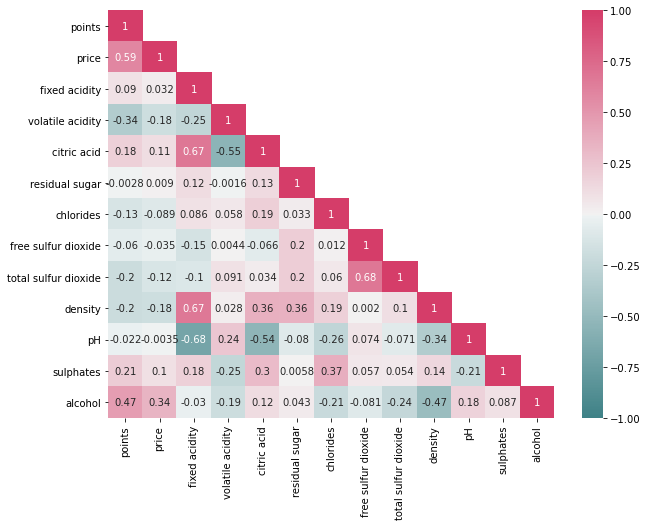

In [36]:
correlation_matrix(dataset)

A next step in our research process is finding an external dataset to complement our existing one with, to help construct our models later in the process. Our original dataset came without source, or explanation of it's origin, but while looking for other datasets to add, we ran into <a href="https://www.kaggle.com/zynicide/wine-reviews">this dataset</a> and <a href="https://archive.ics.uci.edu/ml/datasets/wine+quality">this dataset</a>.
The second dataset seems to correspond to the chemical properties contained in our original dataset. The first dataset seems to correspond to everything else in the original.

We will start referring to the first (new) dataset as the review dataset, the second one as the chemical dataset, and our original dataset as the HU dataset.

The chemical dataset is subdivided into 2 files, for red and white wine respectively.
Let's load them in and have a look:


In [37]:
chem_dataset_red = pd.read_csv("datasets/winequality-red.csv", sep=";")
chem_dataset_white = pd.read_csv("datasets/winequality-white.csv", sep=";")
review_dataset = pd.read_csv("datasets/winemag-data-130k-v2.csv")

In [38]:
chem_dataset_red.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [39]:
chem_dataset_white.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [40]:
review_dataset.head(2)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


Looking through the chemical dataset, it turns out to be <i>anonymised</i>, which is odd, because there are no discernible features to match the review dataset and the chemical dataset on, to create the HU dataset.

The sources for the 2 datasets are also wildly different. The wine dataset was scraped from a website called by a Kaggle user WineEnthusiast in 2017, the chemical dataset has as source:

Paulo Cortez, University of Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez
A. Cerdeira, F. Almeida, T. Matos and J. Reis, Viticulture Commission of the Vinho Verde Region(CVRVV), Porto, Portugal @2009

A paper by a Portuguese professor into data mining from 2009.


Looking back at the earlier correlation matrix with the realisation that the HU dataset might have been created from two separate datasets shows that there are no strong (linear) correlations between attributes from the chemical dataset, and from the review dataset, the strongest one is between the 'alcohol' and 'points' attributes, with a Pearson correlation coefficient of 0.47, which is mediocre at best.

Interestingly, this correlation appears to be very close to the correlation between alcohol and 'quality' in both chemical datasets. In those, quality is another metric for a score that someone gave the wine:

In [41]:
print("Alcohol/Quality correlation in red chemical dataset:")
np.corrcoef(chem_dataset_red['alcohol'], chem_dataset_red['quality'])

Alcohol/Quality correlation in red chemical dataset:


array([[1.        , 0.47616632],
       [0.47616632, 1.        ]])

In [42]:
print("Alcohol/Quality correlation in white chemical dataset:")
np.corrcoef(chem_dataset_white['alcohol'], chem_dataset_white['quality'])

Alcohol/Quality correlation in white chemical dataset:


array([[1.        , 0.43557472],
       [0.43557472, 1.        ]])

This could mean that the datasets were matched on a correlation between the two. In case this is based on a more complicated polynomial/logarithmic correlation, let's scatter the two in the HU dataset to examine them visually:

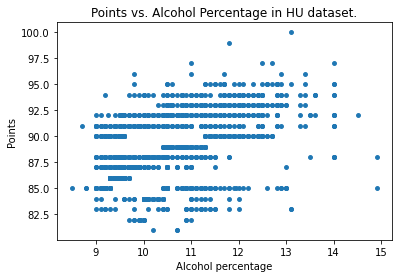

In [43]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title("Points vs. Alcohol Percentage in HU dataset.")
ax.set_xlabel("Alcohol percentage")
ax.set_ylabel("Points")
ax.scatter(dataset["alcohol"], dataset["points"], s=15)
plt.show()

There are no obvious complex correlations, because the data appears to be way too scattered to draw any conclusions from. This also means that basing a merge of 2 datasets on this would be questionable at best.

To verify our dataset-merge hypothesis even further, we also decided to manually look up records from both the left and right dataset manually, and check whether they match. The easiest way to do this seems to be to look up a wine review (allegedly from the review dataset), and it's corresponding alcohol percentage:

In [44]:
dataset[["title", "alcohol"]].head(10)

,title,alcohol
0,Quinta dos Avidagos 2011 Avidagos Red (Douro),9.7
1,Casa Santa Vit�ria 2013 Grande Reserva Tinto R...,9.6
2,Adega Cooperativa de Borba 2012 Montes Claros ...,11.3
3,Quinta de Foz de Arouce 2013 Red (Beira Atlant...,11.3
4,Herdade Grande 2010 Gera��es Colheita Seleccio...,12.4
5,Luis Duarte 2013 Monte de Carrapatelo Colheita...,12.3
6,Quinta da Lagoalva de Cima 2013 Lagoalva Barre...,10.8
7,Quinta do Monte Xisto 2013 Red (Douro),10.0
8,Monte da Penha 2005 Grande Reserva Red (Alentejo),11.0
9,Quinta do Sagrado 2008 VT '08 Red (Douro),11.3


Quinta dos Avidagos 2011 Avidagos Red (Douro)
According to the dataset: 9.7%
According to <a href="https://www.wine-searcher.com/find/quinta+dos+avidagos+tinto+douro+portugal/2011/netherlands#t2">the internet</a>: Between 13 and 14 %

Casa Santa Vit�ria 2013 Grande Reserva Tinto Red (Alentejano)
According to the dataset: 9.6%.
According to <a href="https://www.wine-searcher.com/find/casa+de+santa+vittoria+grand+rsrv+regional+alentejano+alentejo+portugal/2013#t2">the internet.</a>: 14%.

Luis Duarte 2013 Monte de Carrapatelo Colheita Seleccionada Tinto Red (Alentejano) (index 5):
According to the dataset: 12.3%
According to <a href="https://www.specialtycellars.com/wp-content/uploads/2020/08/Monte-De-Carrapatelo-Tinto-2013.pdf">the internet:</a> 14.5%


<h3>Conclusion</h3>

This all leads us to conclude that the HU dataset has probably been merged from 2 different datasets in at best an undocumented way, and at worst an illogical way. Combining this with the fact that there is no discernible source for the dataset, has lead us to decide that in the spirit of the scientific process with regard to transparency, we can't draw conclusions from the HU dataset in good faith. We will rephrase the questions asked to fit the review- and chemicaldataset and use those instead in the next iteration.